In [70]:
import sys
import os
import numpy as np
import pandas as pd

# Add the src directory t\ the Python path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data
from src.mappings import value_mapping, ideology_mapping

In [71]:
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')
dataset_100y = TSD(categories=['sc'], file_path="../datasets/100_yr_dataset.csv")

Dataset loaded from ../datasets/power_transitions.xlsx
Dataset loaded from ../datasets/100_yr_dataset.xlsx


In [72]:
scale_cols = ['Pop','Terr','Cap','Hierarchy']
non_scale_cols = ['Government', 'Infrastructure', 'Information', 'Money']
print(dataset_PT.scv_imputed[scale_cols].isna().any(axis=1).sum())
print(dataset_PT.scv_imputed[non_scale_cols].isna().any(axis=1).sum())
print(dataset_PT.scv_imputed[['MSP']].isna().any(axis=1).sum())
print(dataset_PT.scv_imputed[scale_cols+non_scale_cols+['MSP']].isna().any(axis=1).sum())

915
456
1823
2023


In [67]:
len(dataset_PT.scv_imputed[dataset_PT.scv_imputed[['MSP']].isna().any(axis=1)].PolityName.unique())

290

In [3]:
scale_cols = ['Pop','Terr','Cap','Hierarchy']
scale_pca = dataset_100y.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols))
dataset_PT.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols), pca_func = scale_pca, contributions=True)

Explained variance by each PC:
PC1: 85.99%
PC2: 7.69%
PC3: 4.91%
PC4: 1.40%
Explained variance by each PC:
PC1: 85.99%
PC2: 7.69%
PC3: 4.91%
PC4: 1.40%
PC1 contributions:
Pop: 0.52
Terr: 0.49
Cap: 0.50
Hierarchy: 0.48


PCA(n_components=4)

In [ ]:
dataset_100y.scv.dropna(subset=['MSP'], inplace=True)
dataset_PT.scv.dropna(subset=['MSP'], inplace=True)
dataset_100y.scv_imputed.dropna(subset=['MSP'], inplace=True)
dataset_PT.scv_imputed.dropna(subset=['MSP'], inplace=True)

In [5]:
inst_cols = ['Government', 'Infrastructure', 'Information', 'Money', 'MSP']
inst_pca = dataset_100y.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols))
dataset_PT.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols), pca_func = inst_pca, contributions=True)

Explained variance by each PC:
PC1: 78.50%
PC2: 7.76%
PC3: 6.83%
PC4: 4.24%
PC5: 2.67%
Explained variance by each PC:
PC1: 78.50%
PC2: 7.76%
PC3: 6.83%
PC4: 4.24%
PC5: 2.67%
PC1 contributions:
Government: 0.47
Infrastructure: 0.44
Information: 0.47
Money: 0.43
MSP: 0.43


PCA(n_components=5)

In [21]:
crisis_vars = ['overturn'
              ,'predecessor_assassination'
              ,'intra_elite'
              ,'military_revolt'
              ,'popular_uprising'
              ,'separatist_rebellion'
            #   ,'external_invasion'
            #   ,'external_interference'
              ]

dataset_PT.scv_imputed[crisis_vars].fillna(0, inplace=True)
dataset_PT.scv['Crisis'] = dataset_PT.scv[crisis_vars].sum(axis=1)/len(crisis_vars)
dataset_PT.scv_imputed['Crisis'] = dataset_PT.scv_imputed[crisis_vars].sum(axis=1)/len(crisis_vars)
# 

/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_42590/3304775062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_PT.scv_imputed[crisis_vars].fillna(0, inplace=True)


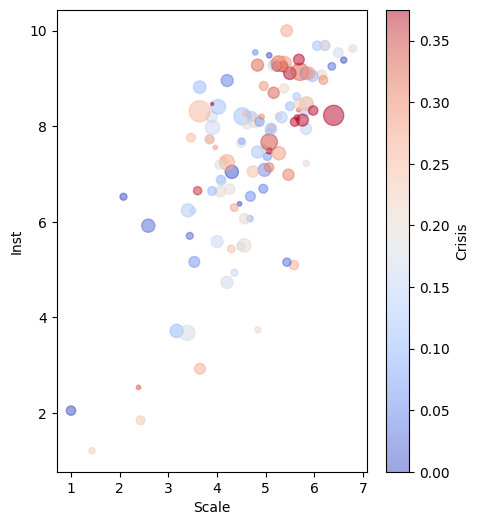

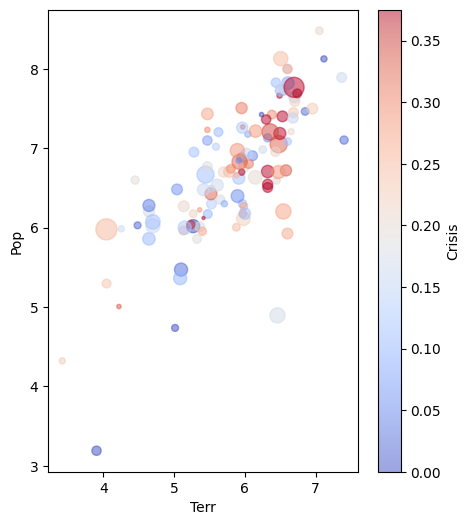

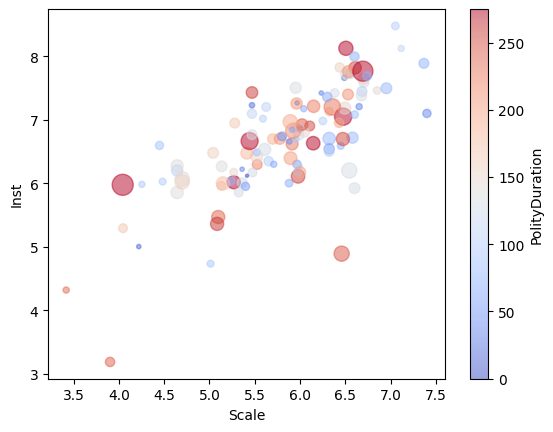

In [24]:
import matplotlib.pyplot as plt

polity_group = dataset_PT.scv_imputed.groupby('PolityName')
fig, ax = plt.subplots(figsize=(5, 6))
# Assuming polity_group is a DataFrame or GroupBy object
mean_inst_1 = polity_group['Inst_1'].mean()
mean_scale_1 = polity_group['Scale_1'].mean()
mean_crisis = polity_group['Crisis'].mean()
pol_duration = polity_group['Year'].max() - polity_group['Year'].min()
num_observations = polity_group.size()
v_max = mean_crisis.max()*.75
# Create a scatter plot
scatter = plt.scatter(mean_scale_1, mean_inst_1,
                      vmin = 0,
                      vmax = v_max,
                      c=mean_crisis,
                      cmap='coolwarm',
                      s=num_observations * 5,
                      alpha=0.5,
                      edgecolors=plt.cm.coolwarm(mean_crisis / v_max)
                      )

# Add a color bar
plt.colorbar(scatter, label='Crisis')

# Show the plot
plt.ylabel('Inst')
plt.xlabel('Scale')
plt.show()

fig, ax = plt.subplots(figsize=(5, 6))
# Assuming polity_group is a DataFrame or GroupBy object
mean_inst_1 = polity_group['Pop'].mean()
mean_scale_1 = polity_group['Terr'].mean()
mean_crisis = polity_group['Crisis'].mean()
pol_duration = polity_group['Year'].max() - polity_group['Year'].min()
num_observations = polity_group.size()
v_max = mean_crisis.max()*.75
# Create a scatter plot
scatter = plt.scatter(mean_scale_1, mean_inst_1,
                      vmin = 0,
                      vmax = v_max,
                      c=mean_crisis,
                      cmap='coolwarm',
                      s=num_observations * 5,
                      alpha=0.5,
                      edgecolors=plt.cm.coolwarm(mean_crisis / v_max)
                      )

# Add a color bar
plt.colorbar(scatter, label='Crisis')

# Show the plot
plt.ylabel('Pop')
plt.xlabel('Terr')
plt.show()

pol_duration = polity_group['Year'].max() - polity_group['Year'].min()
num_observations = polity_group.size()
v_max = pol_duration.max()*.75
# Create a scatter plot
scatter = plt.scatter(mean_scale_1, mean_inst_1,
                      vmin = 0,
                      vmax = v_max,
                      c=pol_duration,
                      cmap='coolwarm',
                      s=num_observations * 5,
                      alpha=0.5,
                      edgecolors=plt.cm.coolwarm(pol_duration / v_max)
                      )

# Add a color bar
plt.colorbar(scatter, label='PolityDuration')

# Show the plot
plt.ylabel('Inst')
plt.xlabel('Scale')
plt.show()

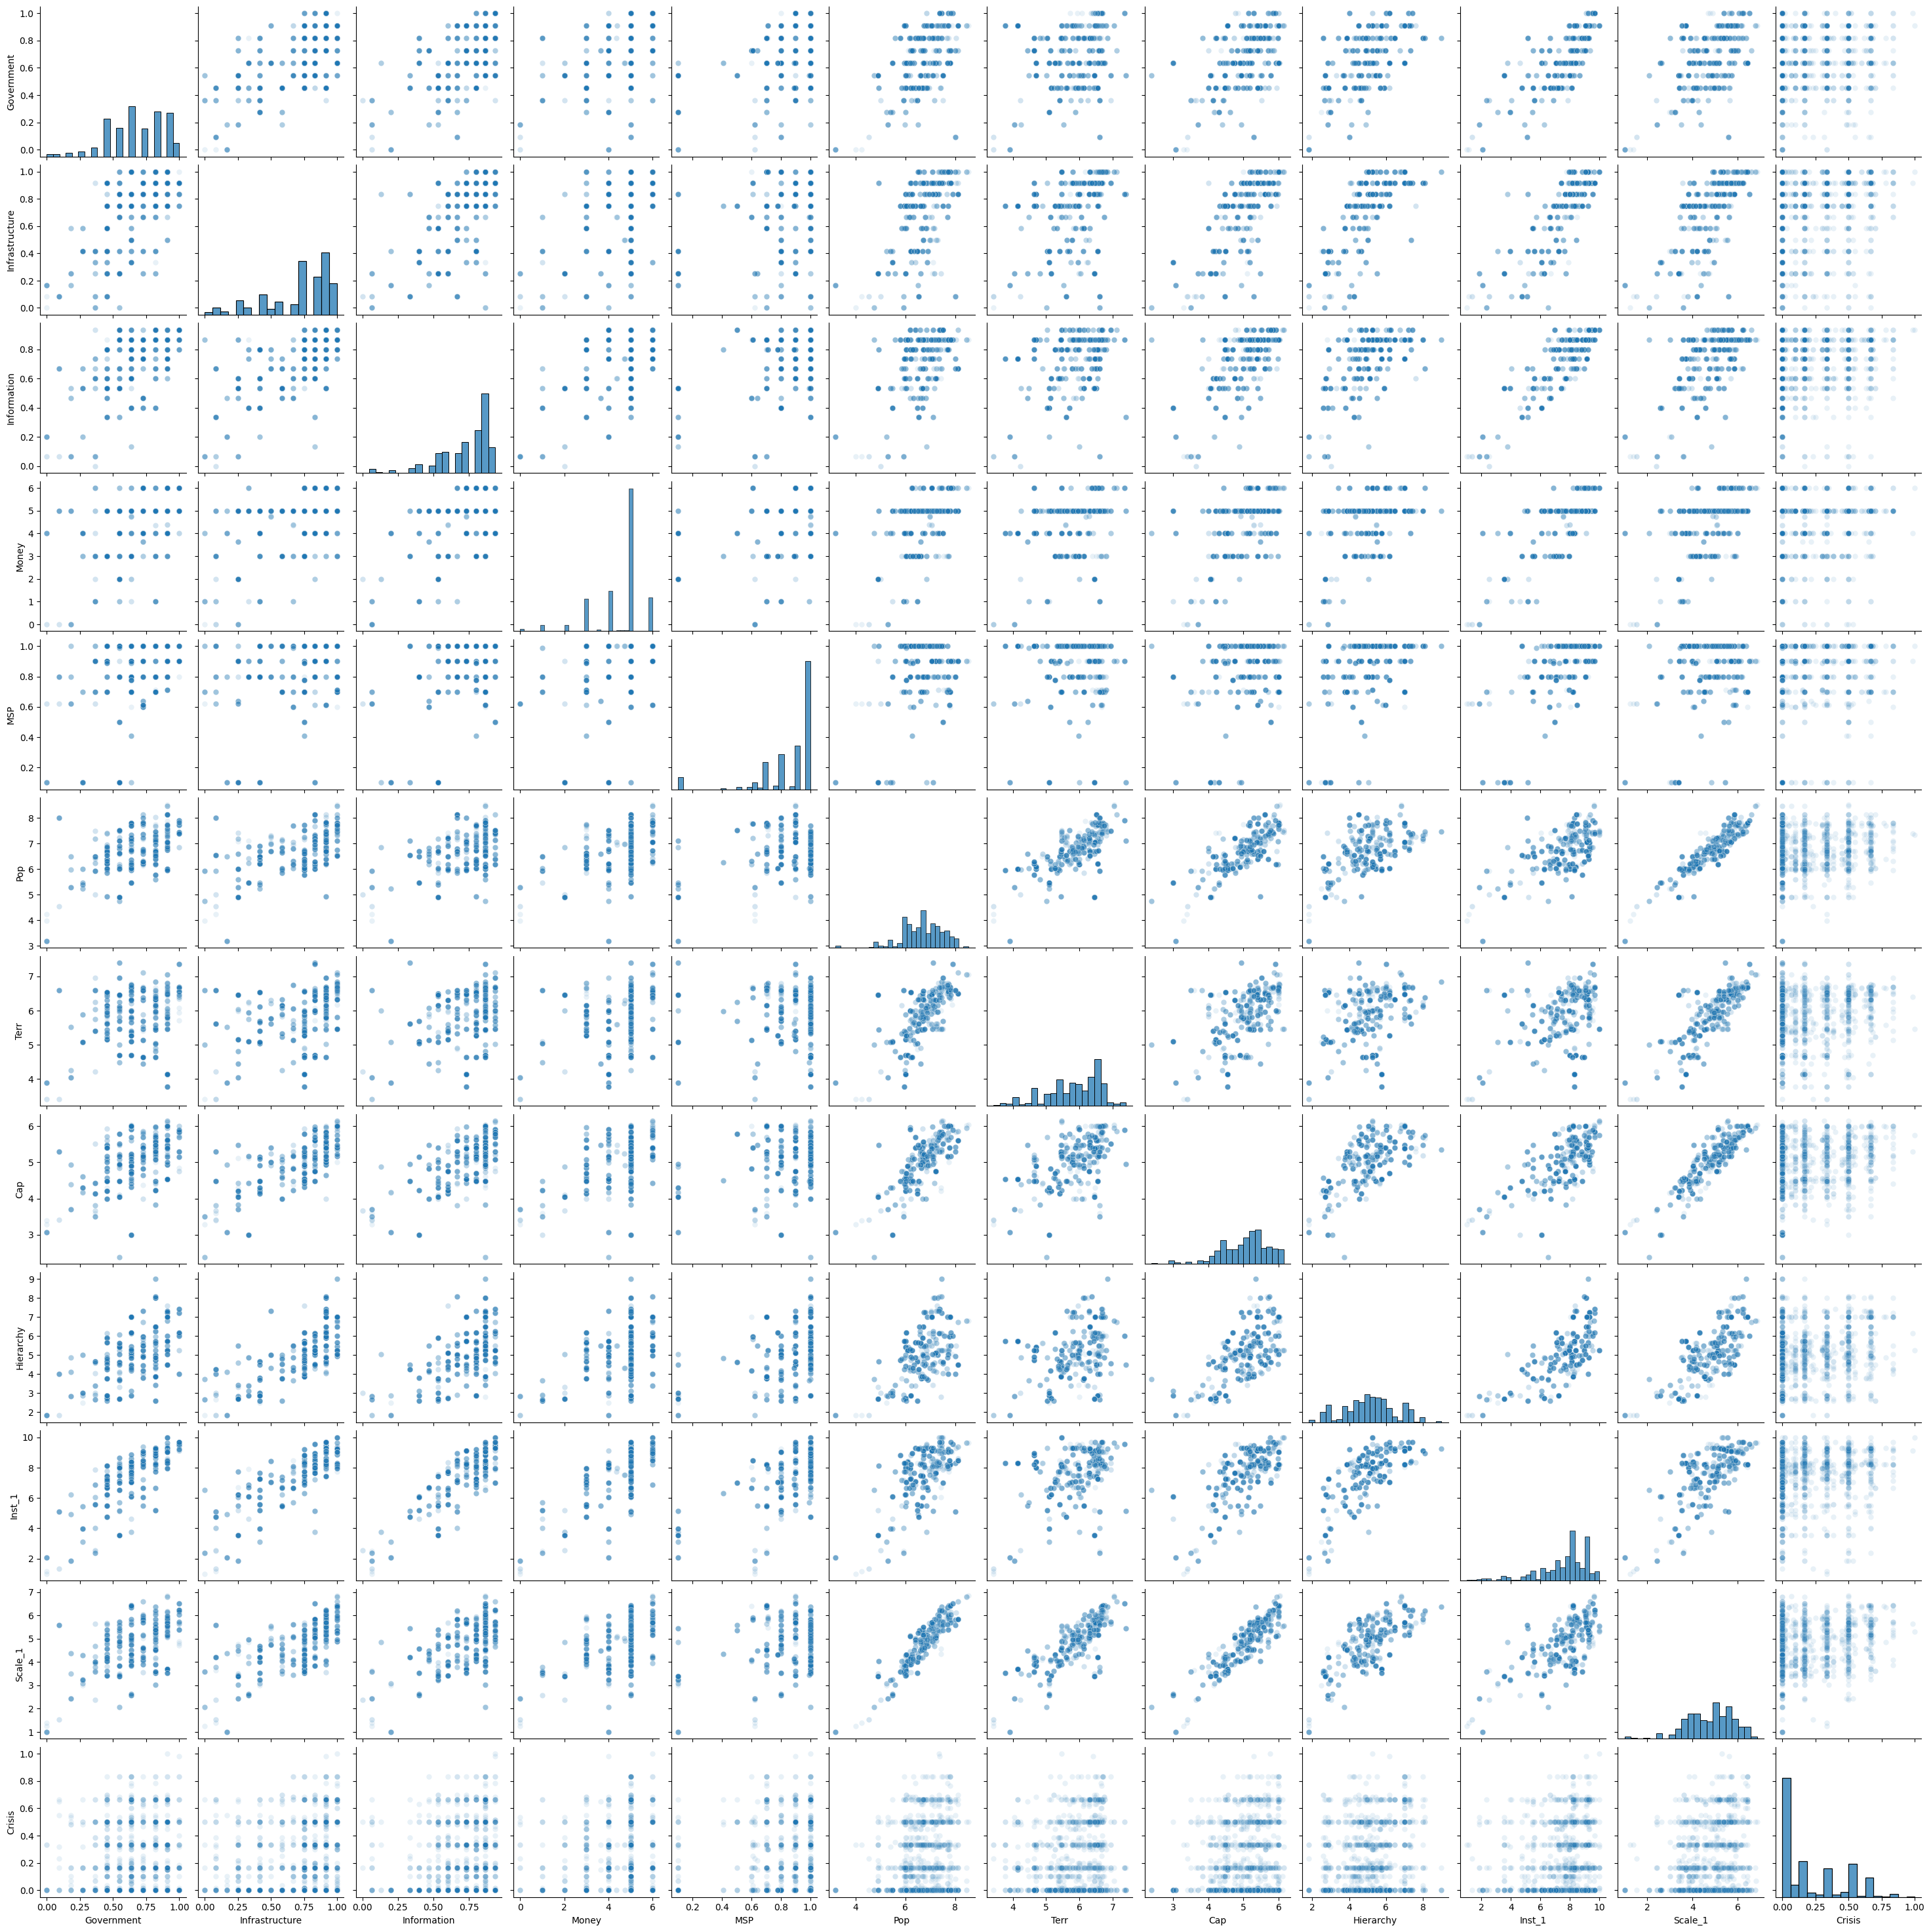

In [30]:
import seaborn as sns
sns.pairplot(dataset_PT.scv_imputed[inst_cols+scale_cols+['Inst_1', 'Scale_1', 'Crisis']], plot_kws={'alpha': 0.1})

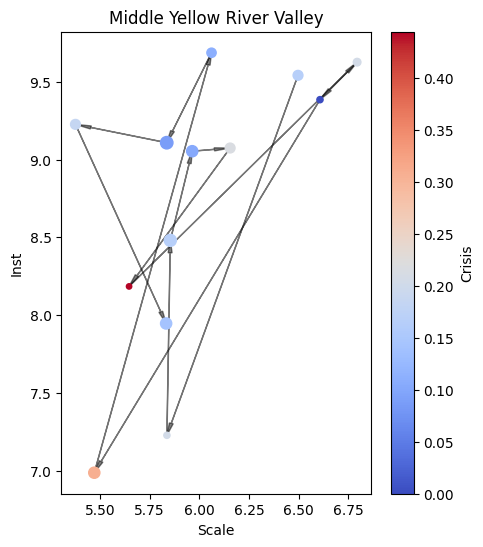

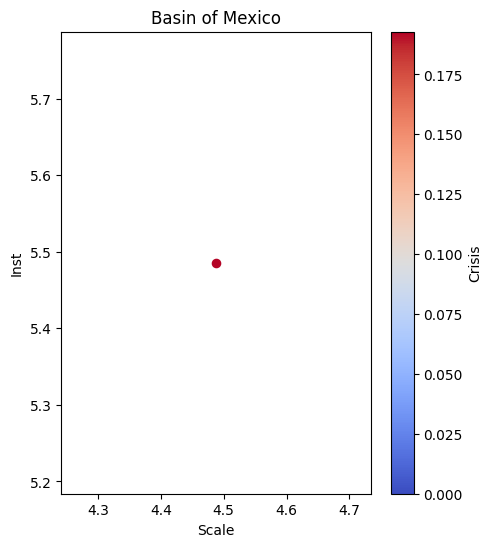

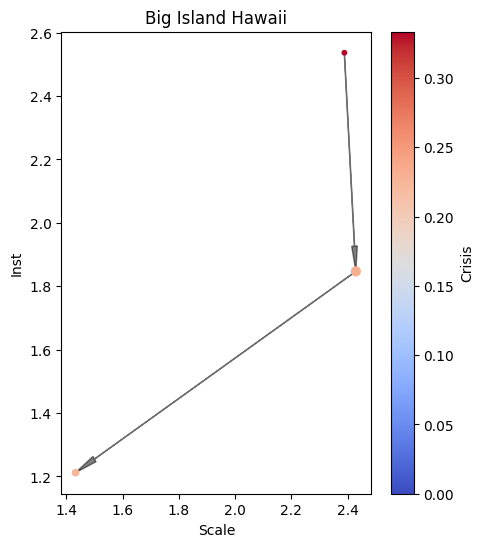

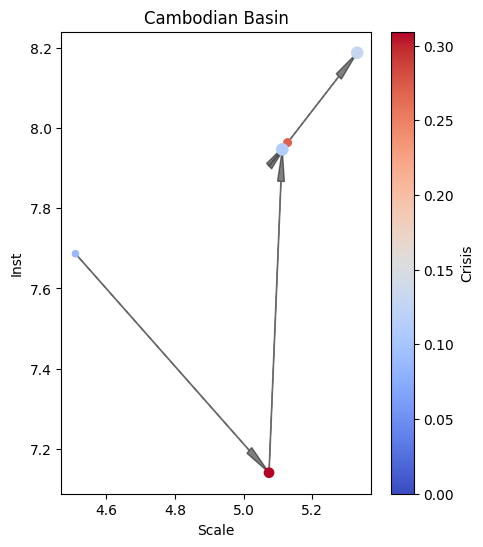

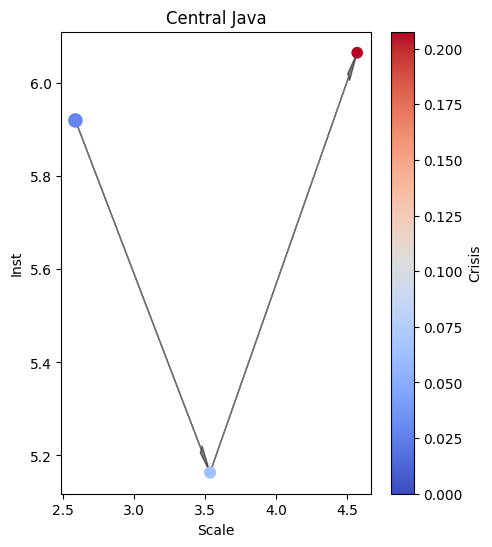

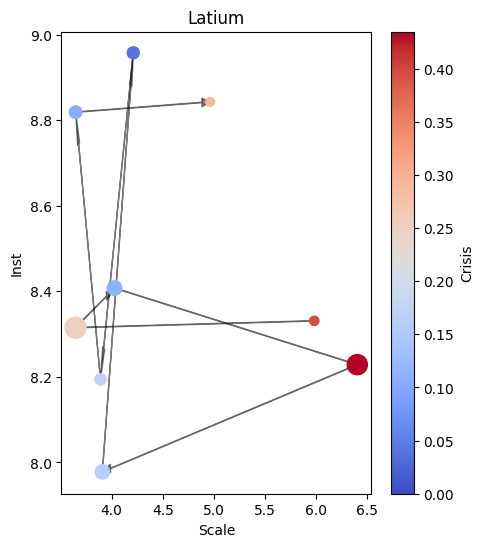

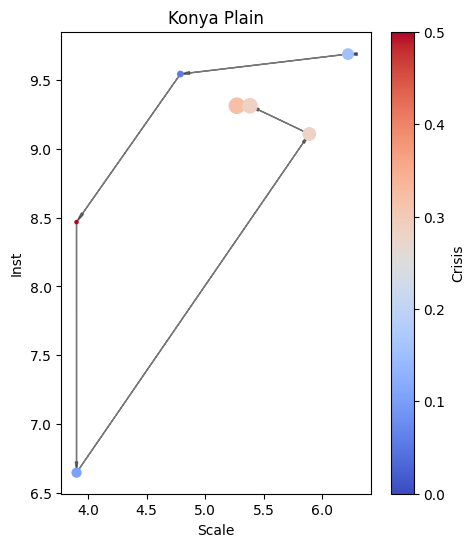

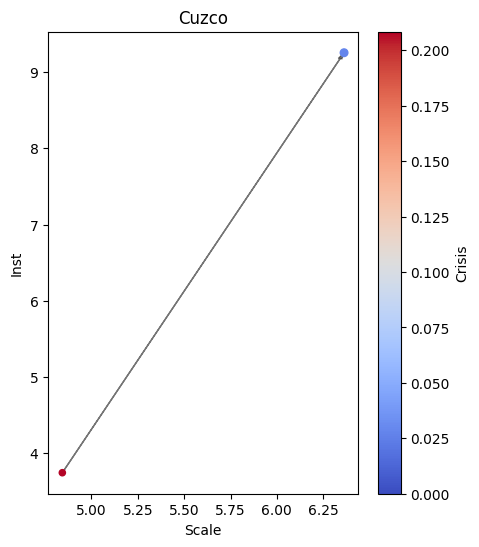

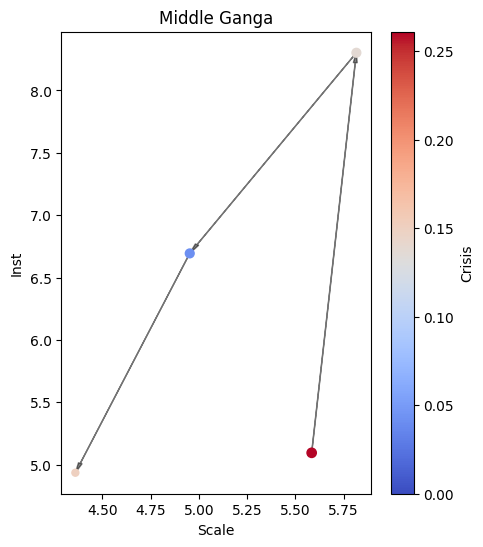

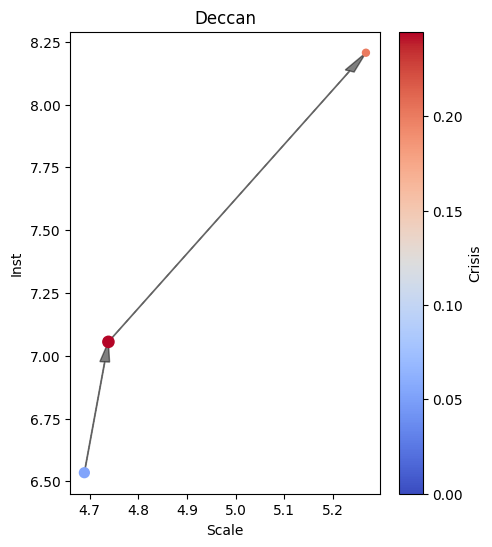

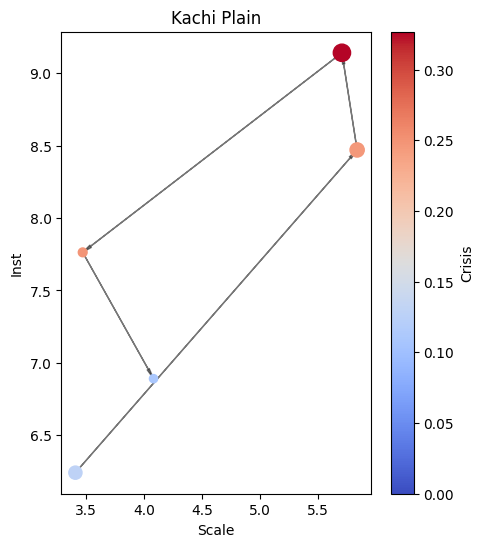

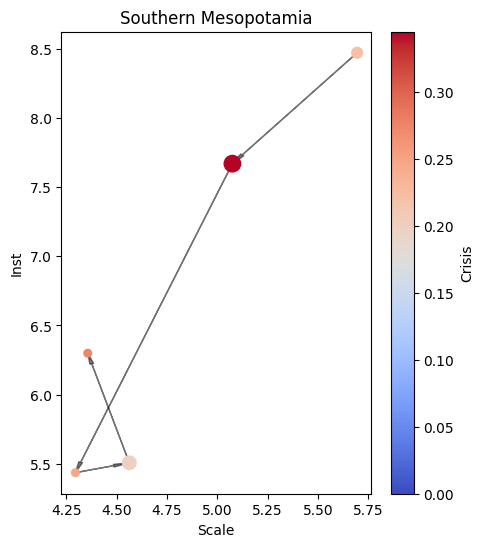

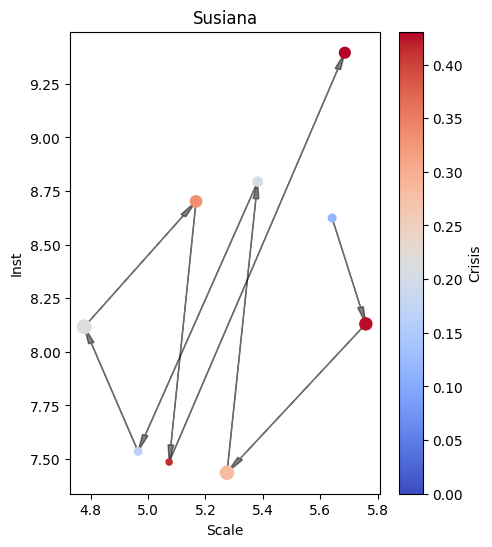

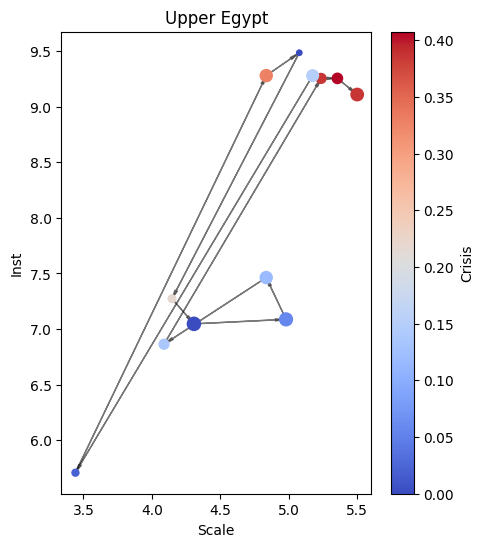

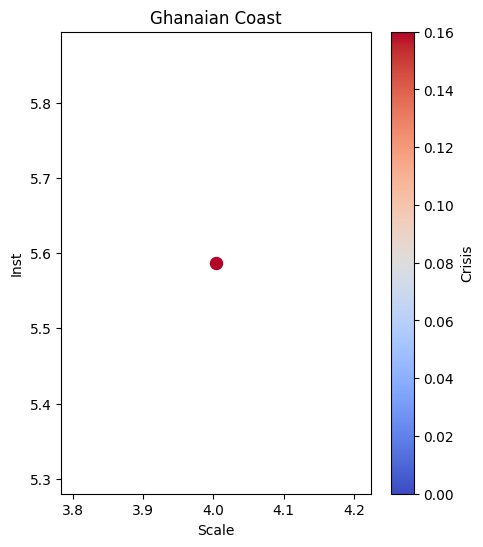

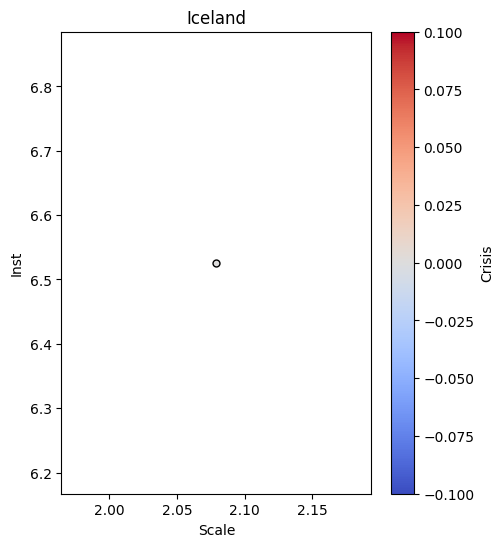

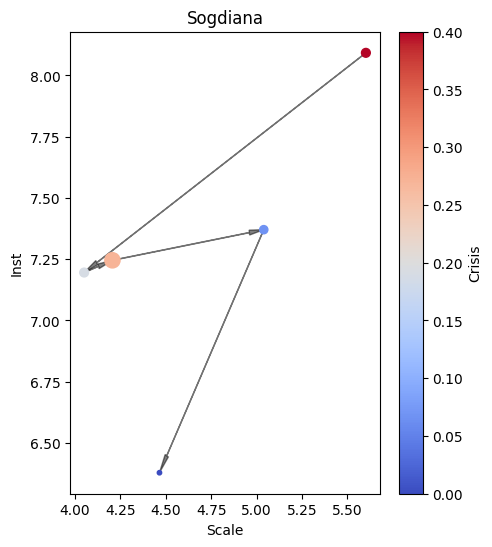

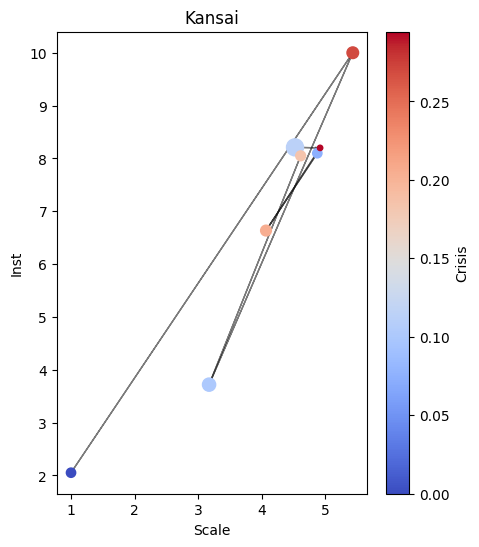

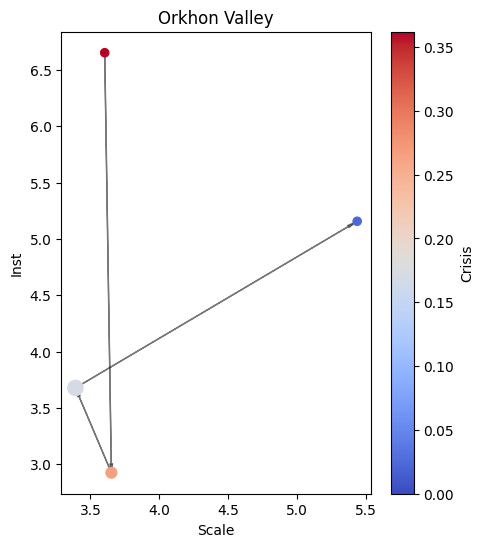

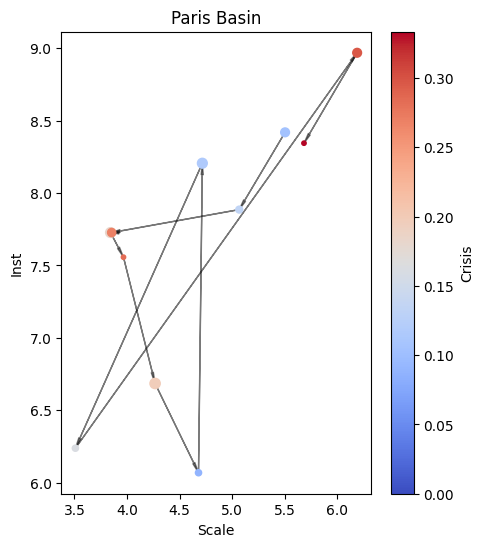

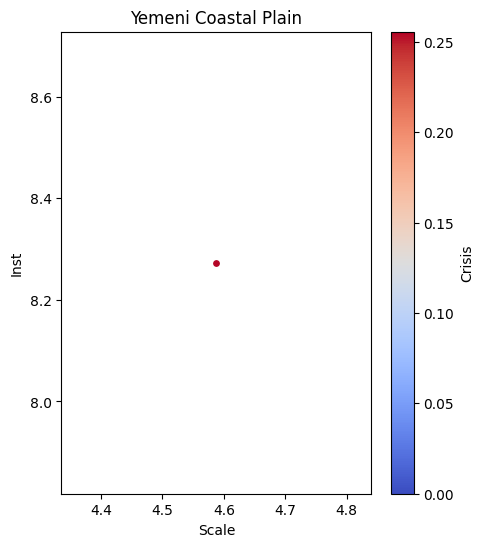

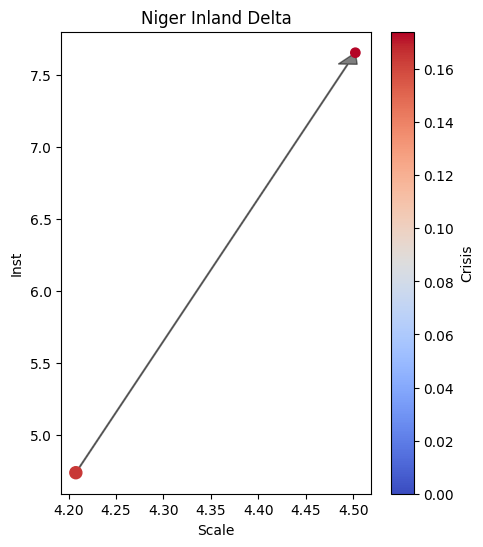

In [12]:
NGAs = dataset_PT.scv_imputed['NGA'].unique()

for nga in NGAs:
    polity_group = dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].groupby('PolityName')
    fig, ax = plt.subplots(figsize=(5, 6))
    # Assuming polity_group is a DataFrame or GroupBy object
    mean_inst_1 = polity_group['Inst_1'].mean()
    mean_scale_1 = polity_group['Scale_1'].mean()
    mean_crisis = polity_group['Crisis'].mean()
    num_observations = polity_group.size()
    
    for i in range(1,len(mean_inst_1)):
        dx = (mean_scale_1[i-1] - mean_scale_1[i]) 
        dy = (mean_inst_1[i-1] - mean_inst_1[i]) 
        plt.arrow(mean_scale_1[i], mean_inst_1[i],dx,dy, head_width=0.02, head_length=0.08, fc='k', ec='k', length_includes_head = True, alpha = 0.5)

    # Create a scatter plot
    scatter = plt.scatter(mean_scale_1, mean_inst_1,
                        vmin = 0,
                        c=mean_crisis,
                        cmap='coolwarm',
                        s=num_observations * 5,
                        alpha=1.0,
                        edgecolors=plt.cm.coolwarm(mean_crisis / mean_crisis.max())
                        )

    # Add a color bar
    plt.colorbar(scatter, label='Crisis')


    # Show the plot
    plt.ylabel('Inst')
    plt.xlabel('Scale')
    plt.title(nga)
    plt.show()

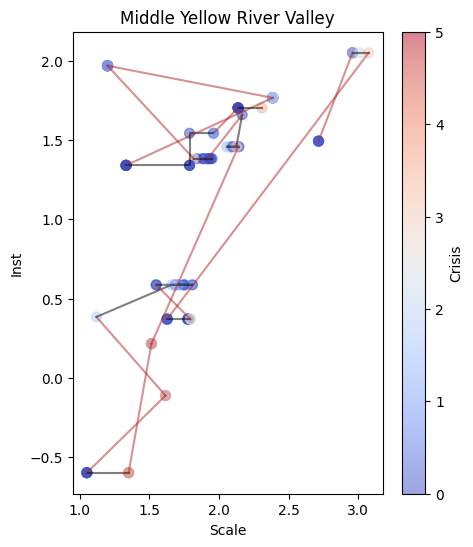

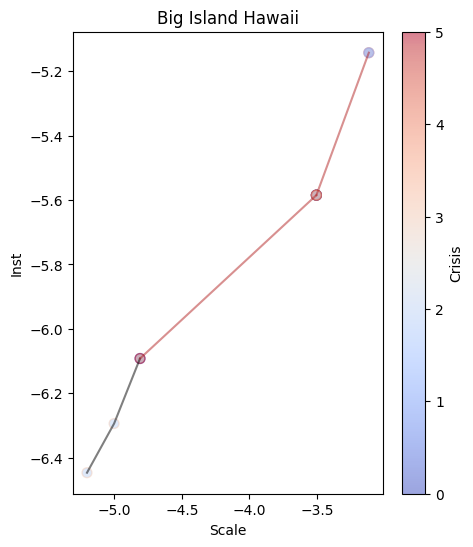

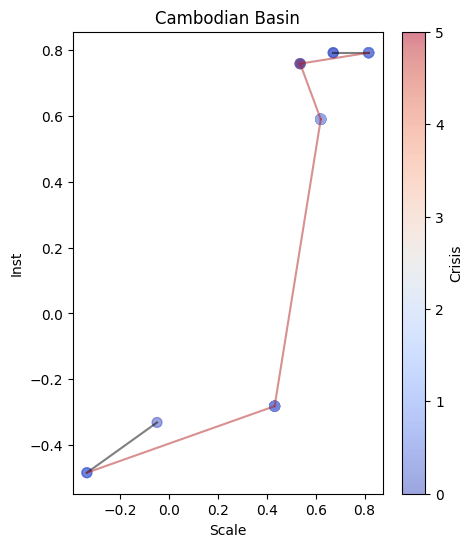

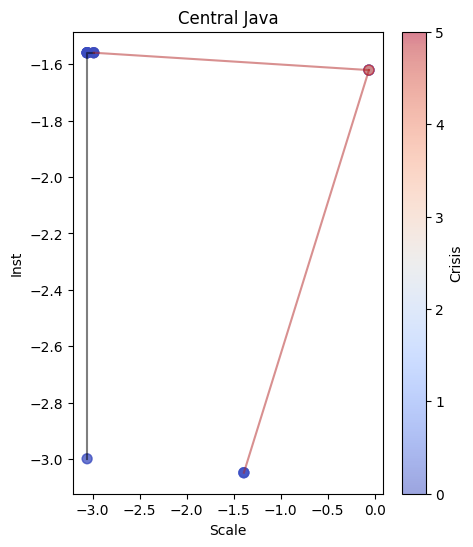

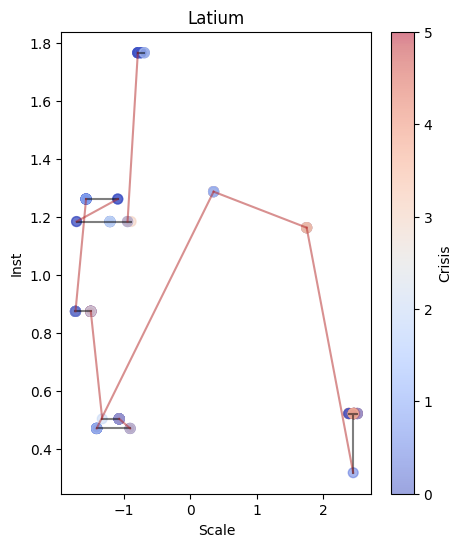

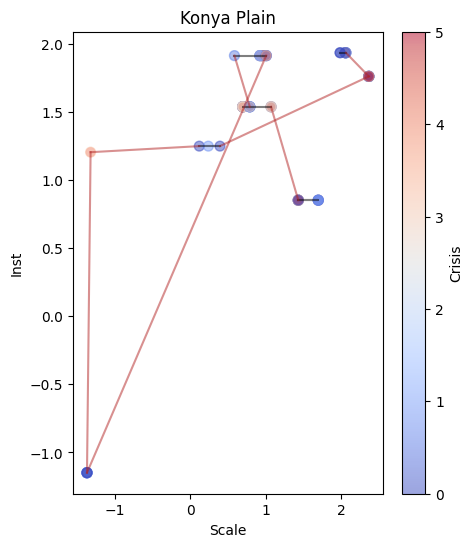

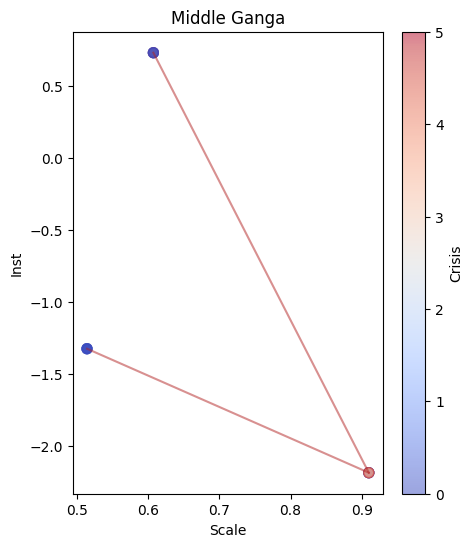

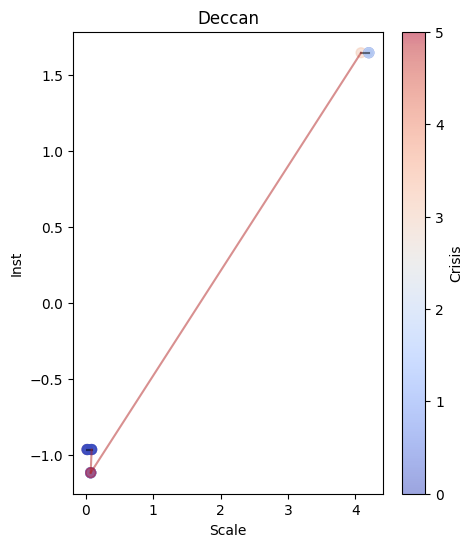

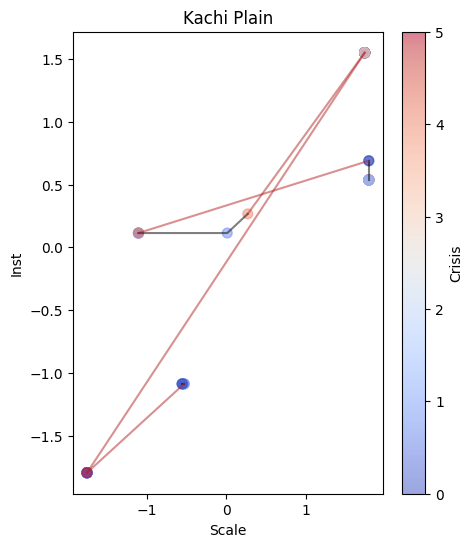

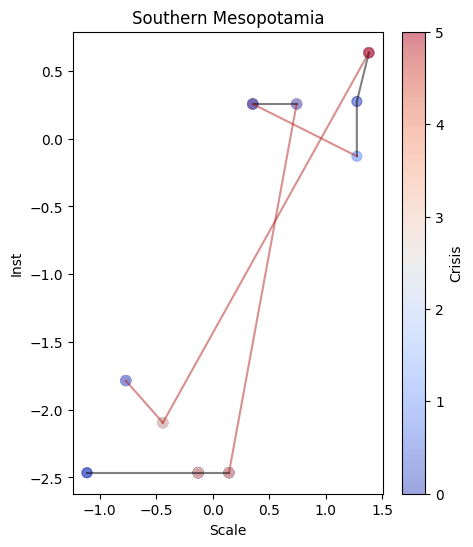

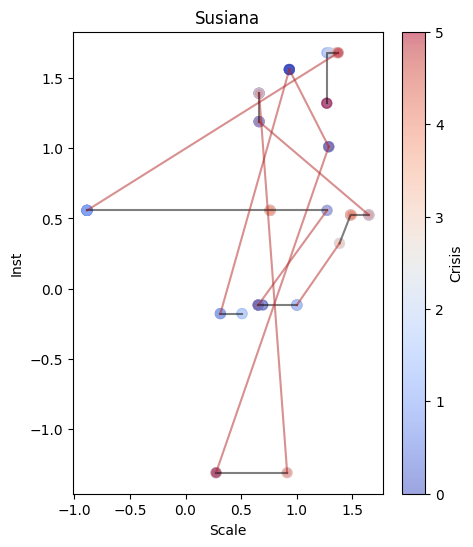

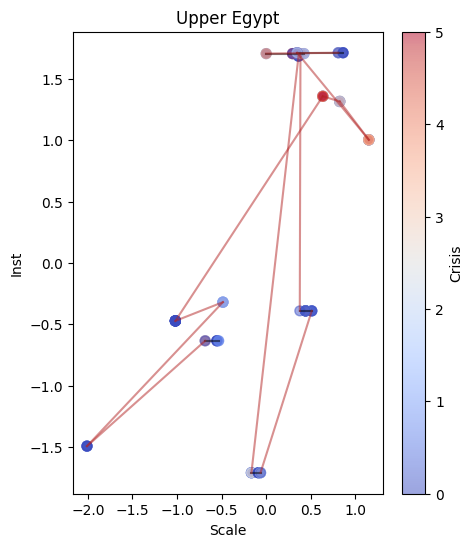

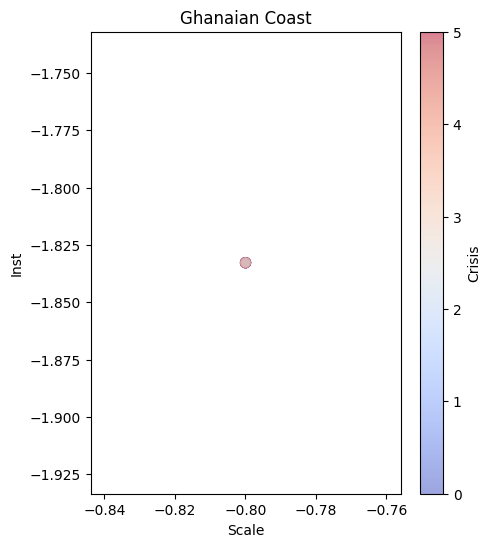

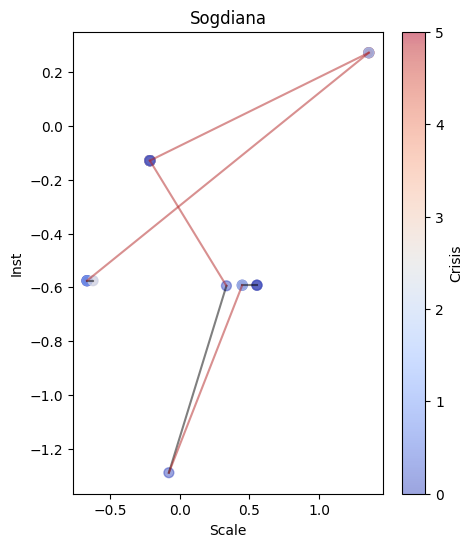

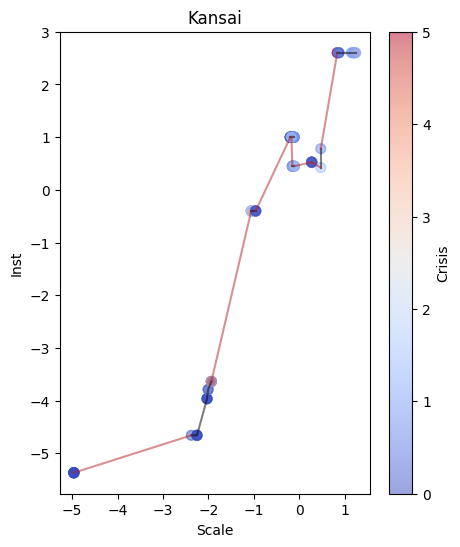

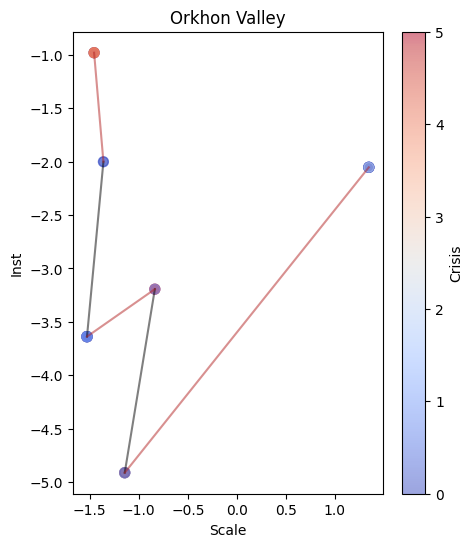

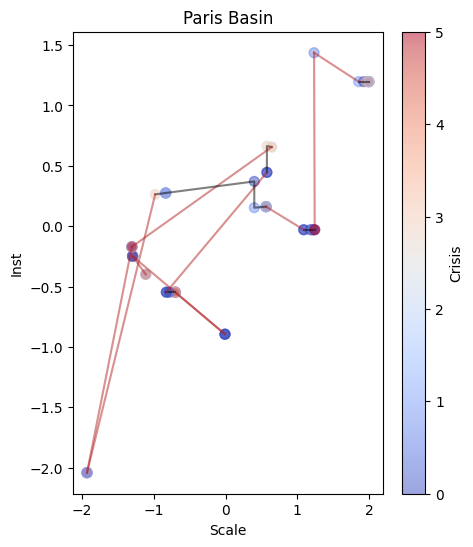

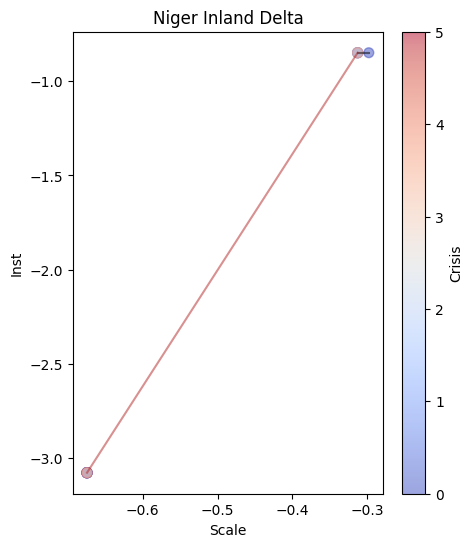

In [ ]:
NGAs = dataset_PT.scv_imputed['NGA'].unique()

for nga in NGAs:

    plot_df = dataset_PT.scv_imputed[dataset_PT.scv_imputed['NGA'] == nga]
    if len(plot_df) > 10:                
        fig, ax = plt.subplots(figsize=(5, 6))

        # Create a scatter plot
        scatter = plt.scatter(plot_df['Scale_1'], plot_df['Inst_1'],
                            vmin=0,
                            vmax = 5,
                            c=plot_df['Crisis'],
                            cmap='coolwarm',
                            s=50,
                            alpha=0.5,
                            edgecolors=plt.cm.coolwarm(plot_df['Crisis'] / plot_df['Crisis'].max())
                            )
        for i,pol in enumerate(plot_df['PolityName'].unique()):
            pol_df = plot_df[plot_df['PolityName'] == pol]
            plt.plot(pol_df['Scale_1'], pol_df['Inst_1'], 'k', alpha=0.5)
            if i > 0:
                prev_pol = plot_df[plot_df['PolityName'] == plot_df['PolityName'].unique()[i-1]]
                plt.plot([prev_pol['Scale_1'].iloc[-1], pol_df['Scale_1'].iloc[0]], [prev_pol['Inst_1'].iloc[-1], pol_df['Inst_1'].iloc[0]], 'firebrick', alpha=0.5)
            
        
        # Add a color bar
        plt.colorbar(scatter, label='Crisis')         
        # Show the plot
        plt.title(nga)
        plt.ylabel('Inst')
        plt.xlabel('Scale')
        plt.show()  
    
